In [27]:
#Importar las librerías por utlizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import skimage
from skimage import io
from skimage.filters import threshold_otsu

#Obtener la direccion de las imagenes
path = os.getcwd()

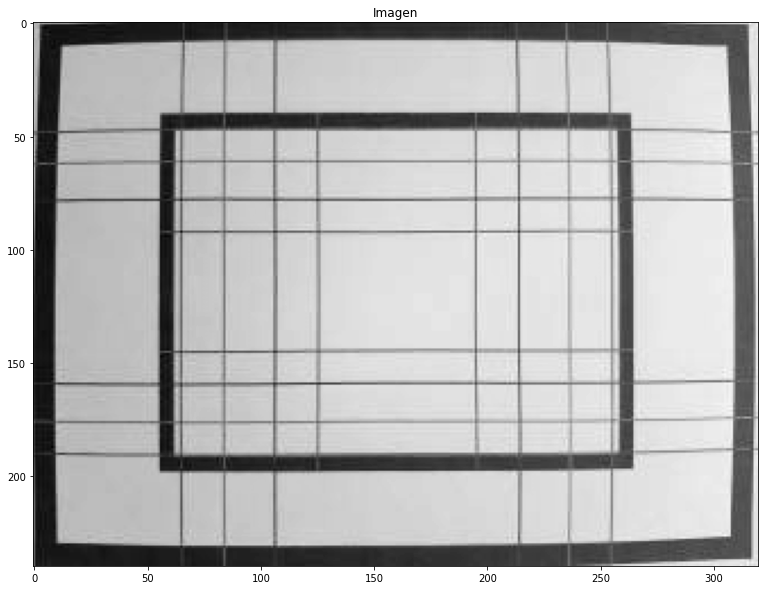

In [28]:
imagen= io.imread(path +r'\Prueba_1.jpeg',True)

plt.figure(figsize=(15,10))
plt.imshow(imagen,cmap='gray')
plt.title("Imagen")
plt.show()

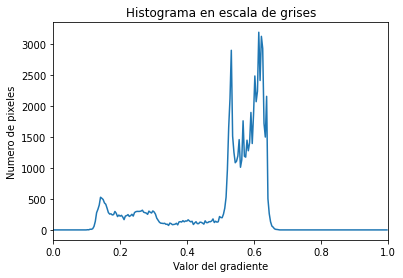

In [29]:
histogram, bin_edges = np.histogram(imagen, bins=256, range=(0, 1))
plt.title("Histograma en escala de grises")
plt.xlabel("Valor del gradiente")
plt.ylabel("Numero de pixeles")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)
plt.show()

0.4072613250612745


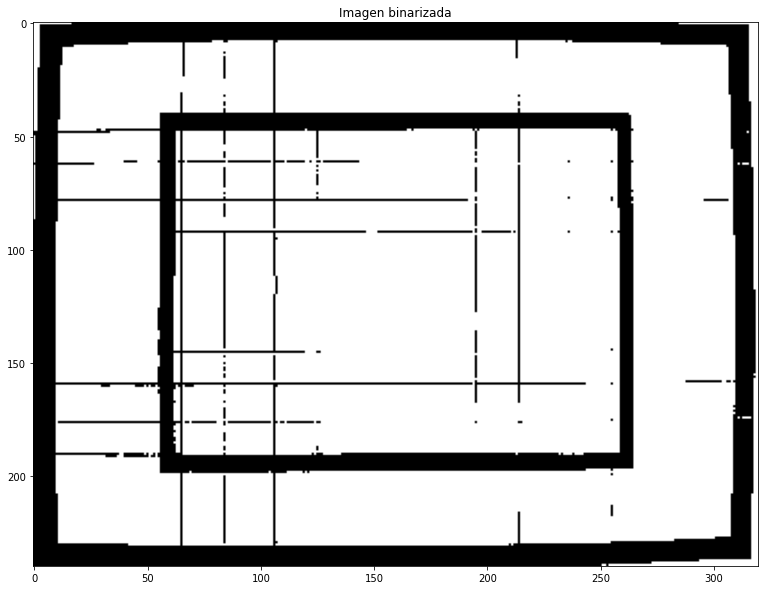

In [30]:
thresh = threshold_otsu(imagen)
print (thresh)
binary = imagen > thresh
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(binary, cmap='gray')
plt.show()

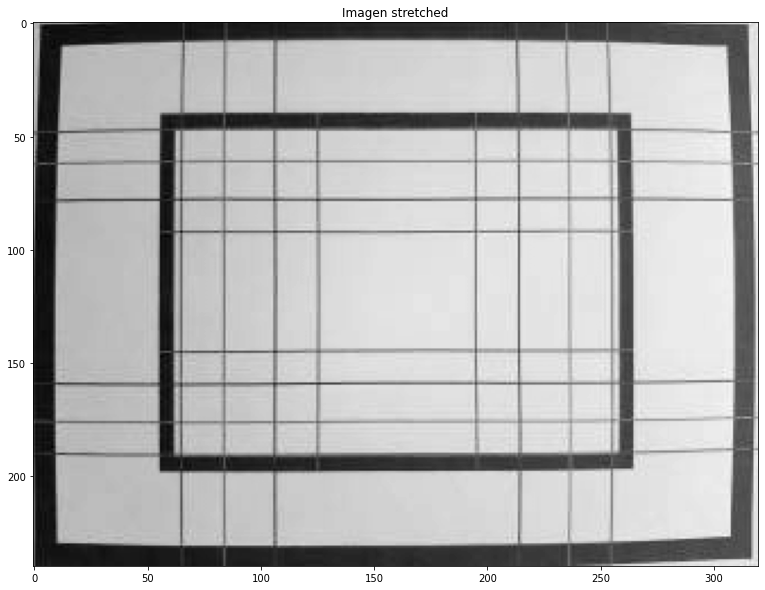

In [31]:
streched = skimage.exposure.rescale_intensity(imagen, in_range=(0.1,0.7), out_range=(0, 1))
plt.figure(figsize=(15,10))
plt.title("Imagen stretched")
plt.imshow(streched, cmap='gray')
plt.show()

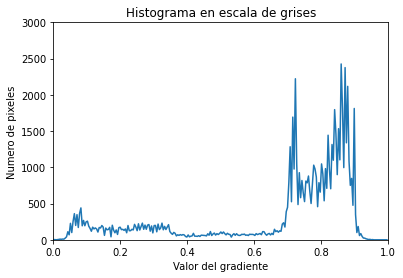

In [32]:
histogram, bin_edges = np.histogram(streched, bins=256, range=(0, 1))
plt.title("Histograma en escala de grises")
plt.xlabel("Valor del gradiente")
plt.ylabel("Numero de pixeles")
plt.ylim([0.0, 3000])
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)
plt.show()

0.5138141748366014


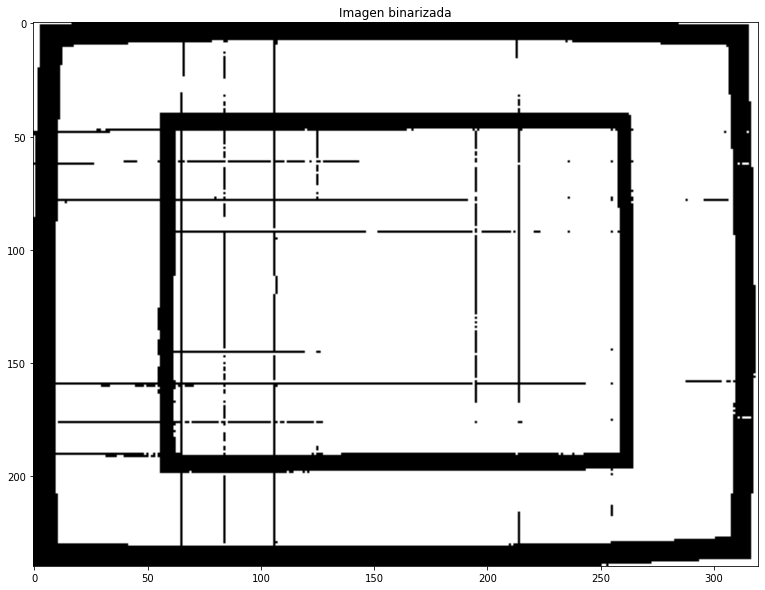

In [33]:
thresh = threshold_otsu(streched)
print (thresh)
binary_str = streched > thresh
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(binary_str, cmap='gray')
plt.show()

Idea: ir recorriendo cada columna de izq a derecha hasta encontrar un pixel de negro y luego ir sobre la misma fila de atras para adelante buscando el primer pixel negro, que representa el ultimo pixel negro, y calcular la distancia horizontal entre ellos, es decir el ancho

In [34]:
def dist_pxl(image):
    v,h = image.shape
    c1 = 0
    c2 = 0
    found = False
    for col in range(h):
        for row in range(v):
            if found == False and image[row][col] == True:
                c1 = col
                found = True
                break
        if found == True:
            break
    found = False
    for col in range(1,h):
        for row in range(0,v):
            if found == False and image[row][-col] == True:
                c2 = h-col
                found = True
                break
        if found == True:
            break
    if found == True:
        return c2-c1+1
    else:
        return 0
    
                

In [35]:
m =np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]])
dist_pxl(binary)

320

In [40]:
def size_obj(image,work_dist):
    sensor_size_h = 4.2
    focal_dist = 3.31
    pxl_dist = dist_pxl(image)
    sens_res_h = sensor_size_h/320
    dist_sens = pxl_dist*sens_res_h
    width = work_dist*dist_sens/focal_dist
    return width

Corregir algunos valores para que los valores sean de ancho

In [39]:
size_obj(binary_str,108)

137.0392749244713